# Laboratorium 03
## Interpolacja
Iga Antonik, Helena Szczepanowska

# Zadanie 1
Populacja Stanów Zjednoczonych na przestrzeni lat przedstawiała się następująco:</br>
| Rok  | Populacja      |
|------|----------------|
| 1900 | 76,212,168     |
| 1910 | 92,228,496     |
| 1920 | 106,021,537    |
| 1930 | 123,202,624    |
| 1940 | 132,164,569    |
| 1950 | 151,325,798    |
| 1960 | 179,323,175    |
| 1970 | 203,302,031    |
| 1980 | 226,542,199    |

Istnieje dokładnie jeden wielomian ósmego stopnia, który interpoluje powyższe dziewięć punktów, natomiast sam wielomian może być reprezentowany na różne sposoby. </br>

Rozważamy następujące zbiory funkcji bazowych φj(t), j = 1,...,9 : </br>

$φj(t) = t^{j−1}$ (1) </br>

$φj(t) = (t −1900)^{j−1}$ (2) </br>

$φj(t) = (t −1940)^{j−1}$ (3) </br>

$φj(t) = ((t −1940)/40)^{j−1}$ (4) </br>

(a) Dla każdego z czterech zbiorów funkcji bazowych utwórz macierz Vander-
monde’a.

(b) Oblicz współczynnik uwarunkowania każdej z powyższch macierzy, używa-
jąc funkcji numpy.linalg.cond.

(c) Używając najlepiej uwarunkowanej bazy wielomianów, znajdź współczyn-
niki wielomianu interpolacyjnego dla danych z zadania. Narysuj wielomian
interpolacyjny. W tym celu użyj schematu Hornera i oblicz na przedziale
[1900,1990] wartości wielomianu w odstępach jednorocznych. Na wykresie
umieść także węzły interpolacji.

(d) Dokonaj ekstrapolacji wielomianu do roku 1990. Porównaj otrzymaną war-
tość z prawdziwą wartością dla roku 1990, wynoszącą 248 709 873. Ile wynosi
błąd względny ekstrapolacji dla roku 1990?

(e) Wyznacz wielomian interpolacyjny Lagrange’a na podstawie 9 węzłów in-
terpolacji podanych w zadaniu. Oblicz wartości wielomianu w odstępach
jednorocznych.

(f) Wyznacz wielomian interpolacyjny Newtona na podstawie tych samych wę-
złów interpolacji i oblicz wartości wielomianu w odstępach jednorocznych.

(g) Zaokrąglij dane podane w tabeli do jednego miliona. Na podstawie takich
danych wyznacz wielomian interpolacyjny ósmego stopnia, używając naj-
lepiej uwarunkowanej bazy z podpunktu (c). Porównaj wyznaczone współ-
czynniki z współczynnikami obliczonymi w podpunkcie (c). Wyjaśnij otrzy-
many wynik.

## Rozwiązanie 

### Biblioteki

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Dane:

In [ ]:
years = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76212168, 92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203302031, 226542199])

j = np.arange(9)


Funkcje bazowe:

In [ ]:
def phi1(t,i):
    return t ** i

def phi2(t,i):
    return (t - 1900) ** i

def phi3(t,i):
    return (t - 1940) ** i

def phi4(t,i):
    return ((t - 1940) / 40) ** i

T_phi = [phi1,phi2,phi3,phi4]

Tworzenie macierzy Vandermonde'a:

In [ ]:
V1 = np.array([[phi1(t,i) for i in j] for t in years ])
V2 = np.array([[phi2(t,i) for i in j] for t in years ])
V3 = np.array([[phi3(t,i) for i in j] for t in years ])
V4 = np.array([[phi4(t,i) for i in j] for t in years ])

T_V = [V1,V2,V3,V4]

Wyliczanie współczynników uwarunkowania:

In [ ]:
cond_V1 = np.linalg.cond(V1)
cond_V2 = np.linalg.cond(V2)
cond_V3 = np.linalg.cond(V3)
cond_V4 = np.linalg.cond(V4)

print("Współczynniki uwarunkowania:")
print("(1) ", cond_V1)
print("(2) ", cond_V2)
print("(3) ", cond_V3)
print("(4) ", cond_V4)

Współczynniki uwarunkowania:
(1)  4.044398246625838e+26
(2)  6211148482504961.0
(3)  9315536040586.037
(4)  1605.4437004786669


Wyznaczenie najmniejszego współczynnika:

In [ ]:
T_cond = [cond_V1,cond_V2,cond_V3,cond_V4]
min_cond = min(T_cond)

Wyliczanie wielomianu interpolacyjnego:

In [ ]:
best_V = T_V[T_cond.index(min_cond)]
phi = T_phi[T_cond.index(min_cond)]


B = lambda t: np.array([phi(t,i) for i in j]) # B - baza
coefficients = np.linalg.solve(best_V, population.T) # A - współczynniki wielomianu interpolacyjnego
p = lambda t: B(t) @ coefficients.T

# Wartości wielomianu na przedziale [1900, 1990] w odstępach jednorocznych
all_years = np.arange(1900, 1991)
interpolated_population = np.array([p(x) for x in all_years])

Wykres:

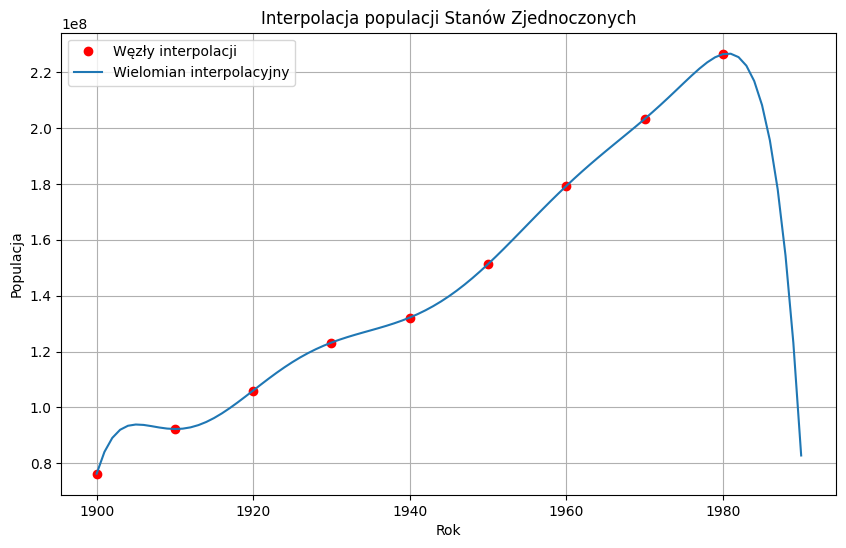

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(years, population, 'ro', label='Węzły interpolacji')
plt.plot(all_years, interpolated_population, label='Wielomian interpolacyjny')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Interpolacja populacji Stanów Zjednoczonych')
plt.legend()
plt.grid(True)
plt.show()

Wyliczenie ekstrapolacji wielomianu i błędu względnego dla 1990 roku:

In [ ]:

extrapolated_population = p(1990)
true_value_1990 = 248709873
error = abs(extrapolated_population - true_value_1990) / true_value_1990 * 100

print("Wartość ekstrapolowana dla roku 1990:", extrapolated_population)
print("Prawdziwa wartość dla roku 1990:", true_value_1990)
print("Błąd względny ekstrapolacji dla roku 1990:", error, "%")

Wartość ekstrapolowana dla roku 1990: 82749140.99999835
Prawdziwa wartość dla roku 1990: 248709873
Błąd względny ekstrapolacji dla roku 1990: 66.72864651416619 %


Wyliczenie wielomianu interpolacyjnego Lagrange'a:</br>

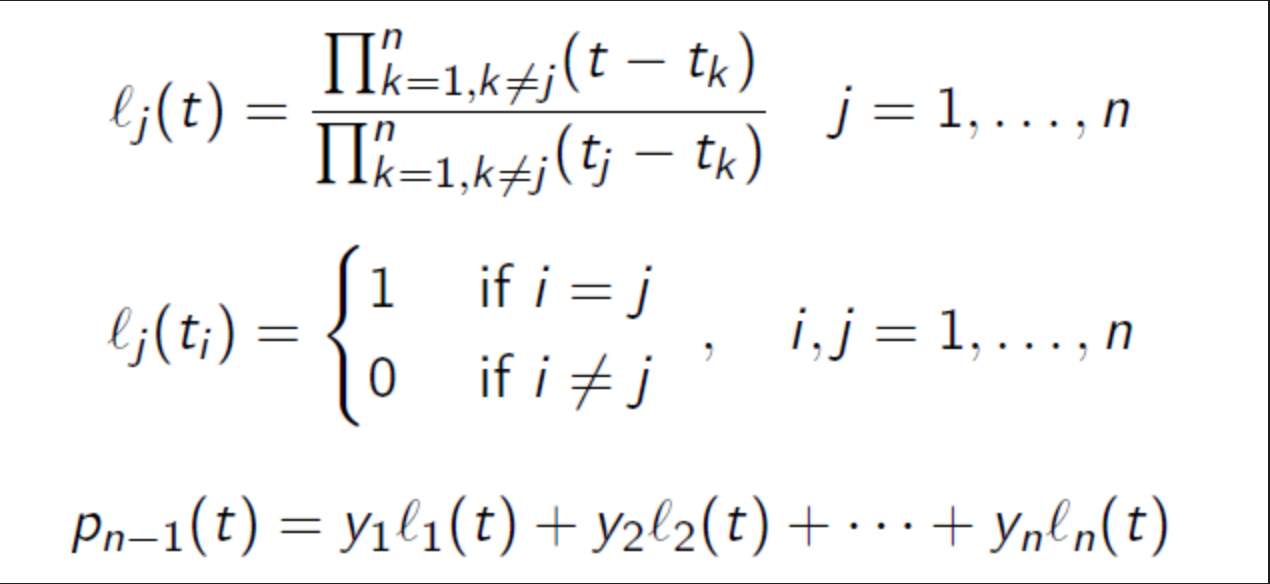</br>

In [ ]:
l = lambda t, j: np.prod(t-years[years!=years[j]])/np.prod(years[j]-years[years!=years[j]])
p_lagerange = lambda t: np.sum([population[j] * l(t, j) for j in range(9)])
interpolated_population_lagrange = np.array([p_lagerange(t) for t in all_years])

Wykres:

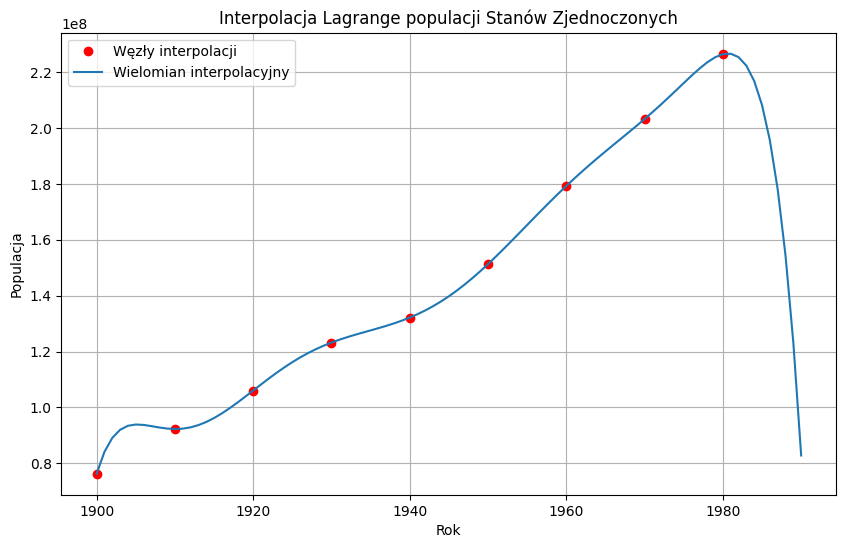

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(years, population, 'ro', label='Węzły interpolacji')
plt.plot(all_years, interpolated_population_lagrange, label='Wielomian interpolacyjny')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Interpolacja Lagrange populacji Stanów Zjednoczonych')
plt.legend()
plt.grid(True)
plt.show()

Wyliczenie wielomianu interpolacyjnego Newtona:</br>

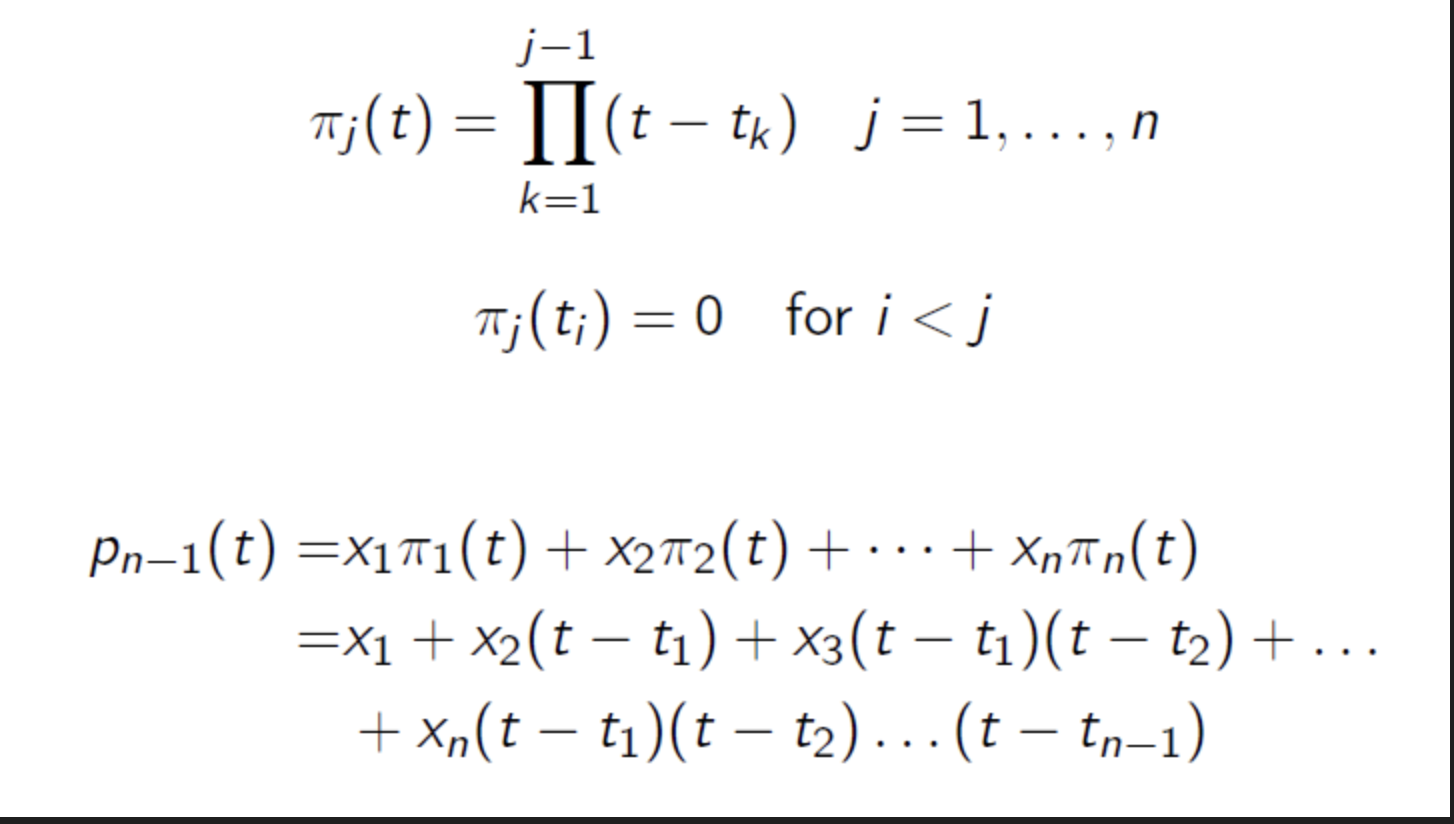</br>

In [ ]:
l_n = lambda t, j: np.prod(t-years[years<years[j]])

def x(i, j):
    if i == j: return population[i]
    return (x(i+1, j) - x(i, j-1))/(years[j] - years[i])

X = [x(0, i) for i in range(9)]
p_n = lambda t: np.sum([X[j] * l_n(t, j) for j in range(9)])

def horner(base, coefficients):
    n = len(coefficients) - 1
    W = coefficients[-1]
    for i in range(n-1, -1, -1):
        W = W*base[i] + coefficients[i]
    return W

interpolated_population_newton = np.array([p_n(t) for t in all_years])

Wykres:

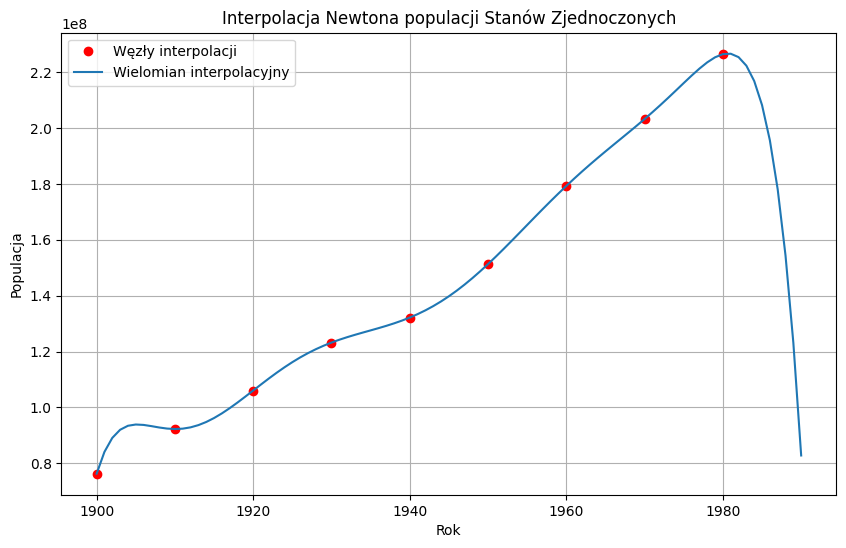

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(years, population, 'ro', label='Węzły interpolacji')
plt.plot(all_years, interpolated_population_newton, label='Wielomian interpolacyjny')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Interpolacja Newtona populacji Stanów Zjednoczonych')
plt.legend()
plt.grid(True)
plt.show()

Wyliczenie wielomiamu interpolacyjnego dla danych zaokrąglonych:

In [ ]:
population_rounded = np.round(population / 1e6) * 1e6
print(population_rounded)
coefficients_rounded = np.linalg.solve(best_V, population_rounded)

p_rounded = lambda t: B(t) @ coefficients.T
interpolated_population_rounded = np.array([p_rounded(x) for x in all_years])


[7.60e+07 9.20e+07 1.06e+08 1.23e+08 1.32e+08 1.51e+08 1.79e+08 2.03e+08
 2.27e+08]


Wykres:

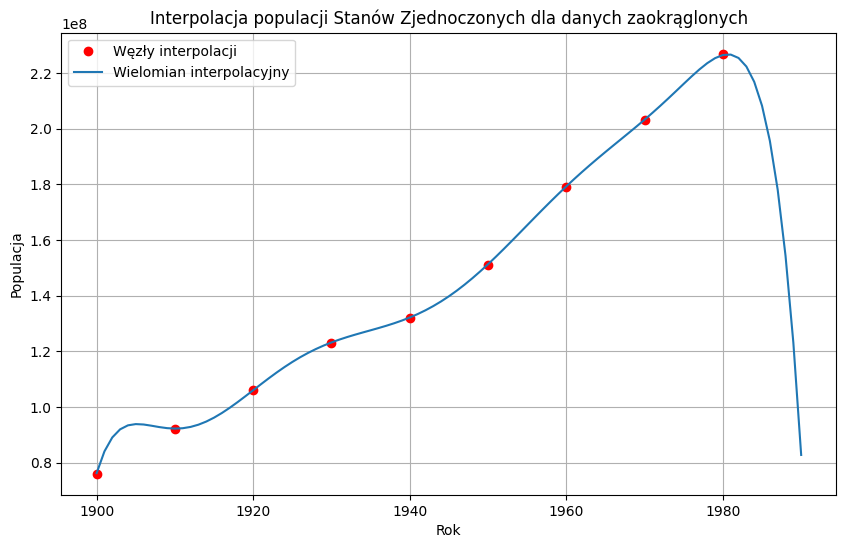

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(years, population_rounded, 'ro', label='Węzły interpolacji')
plt.plot(all_years, interpolated_population_rounded, label='Wielomian interpolacyjny')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Interpolacja populacji Stanów Zjednoczonych dla danych zaokrąglonych')
plt.legend()
plt.grid(True)
plt.show()

Porównanie współczynników wielomianów interpolacyjnych dla danych zwykłych i zaokrąglonych:

In [ ]:
abs_coefficients_difference = np.abs(coefficients_rounded - coefficients)
print("Oryginalne współczynniki: ", coefficients,"\n")
print("Współczynniki dla danych zaokrąglonych: ", coefficients_rounded,"\n")
print("Wartość bezwzględna róznicy wspołczynników: ", abs_coefficients_difference)

Oryginalne współczynniki:  [ 1.32164569e+08  4.61307656e+07  1.02716315e+08  1.82527130e+08
 -3.74614715e+08 -3.42668456e+08  6.06291250e+08  1.89175576e+08
 -3.15180235e+08] 

Współczynniki dla danych zaokrąglonych:  [ 1.32000000e+08  4.59571429e+07  1.00141270e+08  1.81111111e+08
 -3.56755556e+08 -3.38488889e+08  5.70311111e+08  1.86920635e+08
 -2.94196825e+08] 

Wartość bezwzględna róznicy wspołczynników:  [  164569.00000003   173622.71904778  2575044.9444446   1416019.06666657
 17859159.33333355  4179566.93333346 35980138.66666675  2254940.6476191
 20983409.77777779]


Porównanie wartości wielomianów interpolacyjnych dla Lagrange'a i Newtona:

In [ ]:
polynomial_difference = np.abs(interpolated_population_lagrange - interpolated_population_newton)
print(polynomial_difference)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.47034836e-08
 1.49011612e-08 0.00000000e+00 1.49011612e-08 2.98023224e-08
 1.49011612e-08 0.00000000e+00 0.00000000e+00 2.98023224e-08
 0.00000000e+00 1.49011612e-08 2.98023224e-08 0.00000000e+00
 0.00000000e+00 1.49011612e-08 1.49011612e-08 0.00000000e+00
 0.00000000e+00 1.49011612e-08 1.49011612e-08 0.00000000e+00
 1.49011612e-08 0.00000000e+00 1.49011612e-08 0.00000000e+00
 1.49011612e-08 1.49011612e-08 0.00000000e+00 2.98023224e-08
 0.00000000e+00 2.98023224e-08 0.00000000e+00 0.00000000e+00
 2.98023224e-08 1.49011612e-08 1.49011612e-08 0.00000000e+00
 0.00000000e+00 1.49011612e-08 5.96046448e-08 2.98023224e-08
 2.98023224e-08 0.00000000e+00 2.98023224e-08 2.98023224e-08
 5.96046448e-08 2.98023224e-08 0.00000000e+00 2.98023224e-08
 2.98023224e-08 2.98023224e-08 5.96046448e-08 0.00000000e+00
 2.98023224e-08 8.94069672e-08 5.96046448e-08 0.00000000e+00
 2.98023224e-08 5.96046448e-08 8.94069672e-08 2.98023224e-08
 5.96046448e-08 5.960464

## Wnioski
Analizując wykresy obliczonych wielomianów interpolacyjnych można wysnuć wniosek, że każdy z wielomianów daje niemal identyczne wyniki. Po wyliczeniu wartości bezwzględnej z różnicy wartości tych wielomianów w poszczególnych latach dla Lagrange'a i Newtona można zauważyć, że wartości różnią się lecz bardzo nieznacznie.

Ekstrapolacja wielomianu dla roku 1990 znacznie odbiega od faktycznej liczebności populacji w tym czasie, a błąd względny jest zdecydowanie za duży. Świadczy to o tym, że predykcje liczebności za pomocą wyliczonego wielomianu interpolacyjnego bedą niepoprawne.

Po zaokrągleniu danych opisujących liczebność populacji współczynniki różnią się od tych wyliczonych dla danych bardziej dokładnych, jednak w tym przypadku nie wpływa to na wynik.



## Bibliografia

https://heath.cs.illinois.edu/scicomp/notes/cs450_chapt07.pdf

https://math.libretexts.org/Courses/Angelo_State_University/Mathematical_Computing_with_Python/3%3A_Interpolation_and_Curve_Fitting/3.2%3A_Polynomial_Interpolation

prezentacja Interpolation Marcin Kuta